In [2]:
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

from sympy.solvers import solve
from sympy import Symbol

import pandas as pd

In [3]:
def resident(x, t):
    lamda = (beta1*(x[1]+x[2]))
    sdot = rho - mu*x[0] - sigmaS*lamda*x[0]
    i1dot = sigmaS*lamda*x[0] - (mu+alpha1+(sigmaI*lamda))*x[1]
    d11dot = sigmaI*lamda*x[1] - (mu+alpha1)*x[2]
    return sdot,i1dot,d11dot

In [4]:
mu = 0.02
rho = 0.02
sigmaS = 1
sigmaI = 5

beta1=0.75
alpha1 = 0.1 - 0.157**2/0.2*(1 - np.exp(0.2*(beta1 - 0.75)/0.157))

In [5]:
tmax2 = 2000
ts2 = np.linspace(0,200,tmax2)

In [6]:
x0 = [0.8,0.5,0.05]
xs = odeint(resident,x0,ts2)
Ss = xs[:,0]
I1s = xs[:,1]
D11s = xs[:,2]

S=Ss[1999]
I1=I1s[1999]
D11=D11s[1999]

In [7]:
def fitnessgrad():
    lambda1=(betam*(I1+D11))
    alpham = 0.1 - 0.157**2/0.2*(1 - np.exp(0.2*(betam - 0.75)/0.157))
    alphamd = 0.157*np.exp(0.2*(betam - 0.75)/0.157)
    dr = sigmaS*S*(((mu+alpham+(sigmaI*lambda1)-(betam*alphamd))/(mu+alpham+(sigmaI*lambda1))**2)+(((sigmaI*lambda1)/(mu+alpham+(sigmaI*lambda1)))*(((mu+alpham-(betam*alphamd))/(mu+alpham)**2)-(((betam*alphamd)/(mu+alpham))/(mu+alpham+(sigmaI*lambda1)))))) + sigmaI*I1*((mu+alpham-(betam*alphamd))/(mu+alpham)**2)
    return dr 

# $\sigma_S$ and $\mu$

In [8]:
muvals = np.around(np.arange(start=0.005, stop=0.055, step=0.005),decimals=3)
sigmaSvals = np.arange(start=0.00000001, stop=11, step=1)
betamvals = np.around(np.arange(start=0, stop=1.0001, step=0.0001),decimals=4)

In [9]:
#muvals

In [10]:
#sigmaSvals

In [11]:
singstrat=np.zeros((10,11))
singstrat

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [12]:
N=10
for m in range(0,N):
    mu = muvals[m]
    for i in range(0,11):
        sigmaS = sigmaSvals[i] 
        for j in betamvals:
            betam = j 

            S=(mu+alpha1)/(beta1*sigmaS)
            I1=-1*(((-1*alpha1*rho*beta1*sigmaS)+(-1*mu*rho*beta1*sigmaS)+(mu*(alpha1**2))+(2*(mu**2)*alpha1)+(mu**3))/(beta1*((rho*sigmaI*beta1*sigmaS)+((alpha1**2)*sigmaS)+(-1*mu*sigmaI*alpha1)+(2*alpha1*sigmaS*mu)+(-1*(mu**2)*sigmaI)+((mu**2)*sigmaS))))
            D11=(sigmaI*(((beta1**2)*(rho**2)*(sigmaS**2))+(-1*2*alpha1*beta1*mu*rho*sigmaS)+(-1*2*beta1*(mu**2)*rho*sigmaS)+((alpha1**2)*(mu**2))+(2*alpha1*(mu**3))+(mu**4))/(beta1*((rho*sigmaI*beta1*sigmaS)+((alpha1**2)*sigmaS)+(-1*mu*sigmaI*alpha1)+(2*alpha1*sigmaS*mu)+(-1*(mu**2)*sigmaI)+((mu**2)*sigmaS))*sigmaS*(mu+alpha1)))

            dr = fitnessgrad()
            if dr < 0:
                sings = (j + (j-0.001))/2
                singstrat[m][i]=sings
                print("mu=", mu, "sigmaS=", sigmaS, "sings=",sings)
                break 

mu= 0.005 sigmaS= 1e-08 sings= 0.6532
mu= 0.005 sigmaS= 1.00000001 sings= 0.6532
mu= 0.005 sigmaS= 2.00000001 sings= 0.6532
mu= 0.005 sigmaS= 3.0000000099999995 sings= 0.6532
mu= 0.005 sigmaS= 4.00000001 sings= 0.6532
mu= 0.005 sigmaS= 5.000000009999999 sings= 0.6532
mu= 0.005 sigmaS= 6.000000009999999 sings= 0.6532
mu= 0.005 sigmaS= 7.000000009999999 sings= 0.6532
mu= 0.005 sigmaS= 8.000000009999999 sings= 0.6532
mu= 0.005 sigmaS= 9.000000009999999 sings= 0.6532
mu= 0.005 sigmaS= 10.000000009999999 sings= 0.6532
mu= 0.01 sigmaS= 1e-08 sings= 0.694
mu= 0.01 sigmaS= 1.00000001 sings= 0.694
mu= 0.01 sigmaS= 2.00000001 sings= 0.694
mu= 0.01 sigmaS= 3.0000000099999995 sings= 0.694
mu= 0.01 sigmaS= 4.00000001 sings= 0.694
mu= 0.01 sigmaS= 5.000000009999999 sings= 0.694
mu= 0.01 sigmaS= 6.000000009999999 sings= 0.694
mu= 0.01 sigmaS= 7.000000009999999 sings= 0.694
mu= 0.01 sigmaS= 8.000000009999999 sings= 0.694
mu= 0.01 sigmaS= 9.000000009999999 sings= 0.694
mu= 0.01 sigmaS= 10.0000000099999

In [15]:
#singstrat # [row,column]

In [16]:
df = pd.DataFrame(singstrat,columns=[0,1,2,3,4,5,6,7,8,9,10])
#df
df2=df.set_index([pd.Index(muvals)])
df2

,0,1,2,3,4,5,6,7,8,9,10
0.005,0.6532,0.6532,0.6532,0.6532,0.6532,0.6532,0.6532,0.6532,0.6532,0.6532,0.6532
0.010,0.6940,0.6940,0.6940,0.6940,0.6940,0.6940,0.6940,0.6940,0.6940,0.6940,0.6940
0.015,0.7308,0.7308,0.7308,0.7308,0.7308,0.7308,0.7308,0.7308,0.7308,0.7308,0.7308
0.020,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643
0.025,0.7951,0.7951,0.7951,0.7951,0.7951,0.7951,0.7951,0.7951,0.7951,0.7951,0.7951
0.030,0.8237,0.8237,0.8237,0.8237,0.8237,0.8237,0.8237,0.8237,0.8237,0.8237,0.8237
0.035,0.8504,0.8504,0.8504,0.8504,0.8504,0.8504,0.8504,0.8504,0.8504,0.8504,0.8504
0.040,0.8755,0.8755,0.8755,0.8755,0.8755,0.8755,0.8755,0.8755,0.8755,0.8755,0.8755
0.045,0.8991,0.8991,0.8991,0.8991,0.8991,0.8991,0.8991,0.8991,0.8991,0.8991,0.8991
0.050,0.9214,0.9214,0.9214,0.9214,0.9214,0.9214,0.9214,0.9214,0.9214,0.9214,0.9214


Text(33.0, 0.5, 'Mortality Rate, $\\mu$')

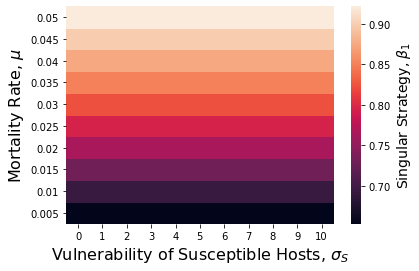

In [17]:
ax=sns.heatmap(df2,cbar_kws={'label': r'Singular Strategy, $\beta_1$'})
ax.figure.axes[-1].yaxis.label.set_size(14)
ax.invert_yaxis()
ax.set_xlabel(r'Vulnerability of Susceptible Hosts, $\sigma_S$',fontsize=16)
ax.set_ylabel(r'Mortality Rate, $\mu$',fontsize=16)    

# $\sigma_S$ and $\rho$

In [18]:
mu=0.02
rhovals = np.around(np.arange(start=0.005, stop=0.055, step=0.005),decimals=3)
sigmaSvals = np.arange(start=0.00000001, stop=11, step=1)
betamvals = np.around(np.arange(start=0, stop=1.0001, step=0.0001),decimals=4)

In [19]:
singstrat=np.zeros((10,11))

In [20]:
N=10
for m in range(0,N):
    rho = rhovals[m]
    for i in range(0,11):
        sigmaS = sigmaSvals[i] 
        for j in betamvals:
            betam = j 

            S=(mu+alpha1)/(beta1*sigmaS)
            I1=-1*(((-1*alpha1*rho*beta1*sigmaS)+(-1*mu*rho*beta1*sigmaS)+(mu*(alpha1**2))+(2*(mu**2)*alpha1)+(mu**3))/(beta1*((rho*sigmaI*beta1*sigmaS)+((alpha1**2)*sigmaS)+(-1*mu*sigmaI*alpha1)+(2*alpha1*sigmaS*mu)+(-1*(mu**2)*sigmaI)+((mu**2)*sigmaS))))
            D11=(sigmaI*(((beta1**2)*(rho**2)*(sigmaS**2))+(-1*2*alpha1*beta1*mu*rho*sigmaS)+(-1*2*beta1*(mu**2)*rho*sigmaS)+((alpha1**2)*(mu**2))+(2*alpha1*(mu**3))+(mu**4))/(beta1*((rho*sigmaI*beta1*sigmaS)+((alpha1**2)*sigmaS)+(-1*mu*sigmaI*alpha1)+(2*alpha1*sigmaS*mu)+(-1*(mu**2)*sigmaI)+((mu**2)*sigmaS))*sigmaS*(mu+alpha1)))

            dr = fitnessgrad()
            if dr < 0:
                sings = (j + (j-0.001))/2
                singstrat[m][i]=sings
                #print("rho=", rho, "sigmaS=", sigmaS, "sings=",sings)
                break 

In [21]:
df = pd.DataFrame(singstrat,columns=[0,1,2,3,4,5,6,7,8,9,10])
#df
df2=df.set_index([pd.Index(rhovals)])
df2

,0,1,2,3,4,5,6,7,8,9,10
0.005,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643
0.010,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643
0.015,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643
0.020,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643
0.025,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643
0.030,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643
0.035,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643
0.040,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643
0.045,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643
0.050,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643


Text(33.0, 0.5, 'Birth Rate, $\\rho$')

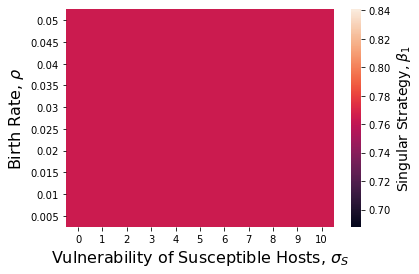

In [22]:
ax=sns.heatmap(df2,cbar_kws={'label': r'Singular Strategy, $\beta_1$'})
ax.figure.axes[-1].yaxis.label.set_size(14)
ax.invert_yaxis()
ax.set_xlabel(r'Vulnerability of Susceptible Hosts, $\sigma_S$',fontsize=16)
ax.set_ylabel(r'Birth Rate, $\rho$',fontsize=16)    

# $\sigma_I$ and $\mu$

In [23]:
rho=0.02
sigmaS=1
muvals = np.around(np.arange(start=0.005, stop=0.055, step=0.005),decimals=3)
sigmaIvals = np.arange(start=0.00000001, stop=11, step=1)
betamvals = np.around(np.arange(start=0, stop=1.0001, step=0.0001),decimals=4)

In [24]:
singstrat=np.zeros((10,11))

In [25]:
N=10
for m in range(0,N):
    mu = muvals[m]
    for i in range(0,11):
        sigmaI = sigmaIvals[i] 
        for j in betamvals:
            betam = j 

            S=(mu+alpha1)/(beta1*sigmaS)
            I1=-1*(((-1*alpha1*rho*beta1*sigmaS)+(-1*mu*rho*beta1*sigmaS)+(mu*(alpha1**2))+(2*(mu**2)*alpha1)+(mu**3))/(beta1*((rho*sigmaI*beta1*sigmaS)+((alpha1**2)*sigmaS)+(-1*mu*sigmaI*alpha1)+(2*alpha1*sigmaS*mu)+(-1*(mu**2)*sigmaI)+((mu**2)*sigmaS))))
            D11=(sigmaI*(((beta1**2)*(rho**2)*(sigmaS**2))+(-1*2*alpha1*beta1*mu*rho*sigmaS)+(-1*2*beta1*(mu**2)*rho*sigmaS)+((alpha1**2)*(mu**2))+(2*alpha1*(mu**3))+(mu**4))/(beta1*((rho*sigmaI*beta1*sigmaS)+((alpha1**2)*sigmaS)+(-1*mu*sigmaI*alpha1)+(2*alpha1*sigmaS*mu)+(-1*(mu**2)*sigmaI)+((mu**2)*sigmaS))*sigmaS*(mu+alpha1)))

            dr = fitnessgrad()
            if dr < 0:
                sings = (j + (j-0.001))/2
                singstrat[m][i]=sings
                #print("mu=", mu, "sigmaI=", sigmaI, "sings=",sings)
                break 

In [26]:
df = pd.DataFrame(singstrat,columns=[0,1,2,3,4,5,6,7,8,9,10])
#df
df2=df.set_index([pd.Index(muvals)])
df2

,0,1,2,3,4,5,6,7,8,9,10
0.005,0.6532,0.6532,0.6532,0.6532,0.6532,0.6532,0.6532,0.6532,0.6532,0.6532,0.6532
0.010,0.6940,0.6940,0.6940,0.6940,0.6940,0.6940,0.6940,0.6940,0.6940,0.6940,0.6940
0.015,0.7308,0.7308,0.7308,0.7308,0.7308,0.7308,0.7308,0.7308,0.7308,0.7308,0.7308
0.020,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643
0.025,0.7951,0.7951,0.7951,0.7951,0.7951,0.7951,0.7951,0.7951,0.7951,0.7951,0.7951
0.030,0.8237,0.8237,0.8237,0.8237,0.8237,0.8237,0.8237,0.8237,0.8237,0.8237,0.8237
0.035,0.8504,0.8504,0.8504,0.8504,0.8504,0.8504,0.8504,0.8504,0.8504,0.8504,0.8504
0.040,0.8755,0.8755,0.8755,0.8755,0.8755,0.8755,0.8755,0.8755,0.8755,0.8755,0.8755
0.045,0.8991,0.8991,0.8991,0.8991,0.8991,0.8991,0.8991,0.8991,0.8991,0.8991,0.8991
0.050,0.9214,0.9214,0.9214,0.9214,0.9214,0.9214,0.9214,0.9214,0.9214,0.9214,0.9214


Text(33.0, 0.5, 'Mortality Rate, $\\mu$')

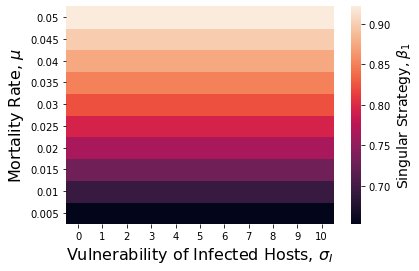

In [27]:
ax=sns.heatmap(df2,cbar_kws={'label': r'Singular Strategy, $\beta_1$'})
ax.figure.axes[-1].yaxis.label.set_size(14)
ax.invert_yaxis()
ax.set_xlabel(r'Vulnerability of Infected Hosts, $\sigma_I$',fontsize=16)
ax.set_ylabel(r'Mortality Rate, $\mu$',fontsize=16)    

# $\sigma_I$ and $\rho$

In [28]:
mu=0.02
rhovals = np.around(np.arange(start=0.005, stop=0.055, step=0.005),decimals=3)
sigmaIvals = np.arange(start=0.00000001, stop=11, step=1)
betamvals = np.around(np.arange(start=0, stop=1.0001, step=0.0001),decimals=4)

In [29]:
singstrat=np.zeros((10,11))

In [30]:
N=10
for m in range(0,N):
    rho = rhovals[m]
    for i in range(0,11):
        sigmaI = sigmaIvals[i] 
        for j in betamvals:
            betam = j 

            S=(mu+alpha1)/(beta1*sigmaS)
            I1=-1*(((-1*alpha1*rho*beta1*sigmaS)+(-1*mu*rho*beta1*sigmaS)+(mu*(alpha1**2))+(2*(mu**2)*alpha1)+(mu**3))/(beta1*((rho*sigmaI*beta1*sigmaS)+((alpha1**2)*sigmaS)+(-1*mu*sigmaI*alpha1)+(2*alpha1*sigmaS*mu)+(-1*(mu**2)*sigmaI)+((mu**2)*sigmaS))))
            D11=(sigmaI*(((beta1**2)*(rho**2)*(sigmaS**2))+(-1*2*alpha1*beta1*mu*rho*sigmaS)+(-1*2*beta1*(mu**2)*rho*sigmaS)+((alpha1**2)*(mu**2))+(2*alpha1*(mu**3))+(mu**4))/(beta1*((rho*sigmaI*beta1*sigmaS)+((alpha1**2)*sigmaS)+(-1*mu*sigmaI*alpha1)+(2*alpha1*sigmaS*mu)+(-1*(mu**2)*sigmaI)+((mu**2)*sigmaS))*sigmaS*(mu+alpha1)))

            dr = fitnessgrad()
            if dr < 0:
                sings = (j + (j-0.001))/2
                singstrat[m][i]=sings
                #print("rho=", rho, "sigmaI=", sigmaI, "sings=",sings)
                break 

In [31]:
df = pd.DataFrame(singstrat,columns=[0,1,2,3,4,5,6,7,8,9,10])
#df
df2=df.set_index([pd.Index(rhovals)])
df2

,0,1,2,3,4,5,6,7,8,9,10
0.005,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643
0.010,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643
0.015,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643
0.020,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643
0.025,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643
0.030,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643
0.035,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643
0.040,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643
0.045,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643
0.050,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643,0.7643


Text(33.0, 0.5, 'Birth Rate, $\\rho$')

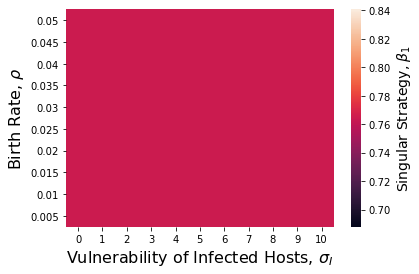

In [32]:
ax=sns.heatmap(df2,cbar_kws={'label': r'Singular Strategy, $\beta_1$'})
ax.figure.axes[-1].yaxis.label.set_size(14)
ax.invert_yaxis()
ax.set_xlabel(r'Vulnerability of Infected Hosts, $\sigma_I$',fontsize=16)
ax.set_ylabel(r'Birth Rate, $\rho$',fontsize=16)    